# **House Price Prediction**

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing the dataset

In [ ]:
data = pd.read_csv('housepricetrain.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# show stats
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# what's the data type?
# how many non-null values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.isnull().values.any()

True

In [ ]:
pd.options.display.min_rows = 100
data.isnull().sum()

In [ ]:
# how many nulls in each col?
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# what are the unique values in each col?
print(data['Alley'].unique())
print(data['MasVnrType'].unique())
print(data['BsmtQual'].unique())
print(data['BsmtCond'].unique())
print(data['BsmtExposure'].unique())
print(data['BsmtFinType1'].unique())
print(data['BsmtFinType2'].unique())
print(data['Electrical'].unique())
print(data['FireplaceQu'].unique())
print(data['GarageType'].unique())
print(data['GarageFinish'].unique())
print(data['GarageQual'].unique())
print(data['GarageCond'].unique())
print(data['PoolQC'].unique())
print(data['Fence'].unique())
print(data['MiscFeature'].unique())

[nan 'Grvl' 'Pave']
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# variance?
data.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

## Encoding categorical data

In [ ]:
list_1=list(data.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    data[i]=le.fit_transform(data[i])

TypeError: ignored

In [ ]:
print(data)

     Mileage  Make  Model  Trim  ...  Cruise  Sound  Leather        Price
0       8221     0     10    44  ...       1      1        1  17314.10313
1       9135     0     10    44  ...       1      1        0  17542.03608
2      13196     0     10    44  ...       1      1        0  16218.84786
3      16342     0     10    44  ...       1      0        0  16336.91314
4      19832     0     10    44  ...       1      0        1  16339.17032
..       ...   ...    ...   ...  ...     ...    ...      ...          ...
799    16229     5     21    21  ...       1      0        0  16507.07027
800    19095     5     21    21  ...       1      1        0  16175.95760
801    20484     5     21    21  ...       1      1        0  15731.13290
802    25979     5     21    21  ...       1      1        0  15118.89323
803    35662     5     21    21  ...       1      0        0  13585.63680

[804 rows x 12 columns]


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
print(X)

     Mileage  Make  Model  Trim  Type  ...  Liter  Doors  Cruise  Sound  Leather
0       8221     0     10    44     3  ...    3.1      4       1      1        1
1       9135     0     10    44     3  ...    3.1      4       1      1        0
2      13196     0     10    44     3  ...    3.1      4       1      1        0
3      16342     0     10    44     3  ...    3.1      4       1      0        0
4      19832     0     10    44     3  ...    3.1      4       1      0        1
..       ...   ...    ...   ...   ...  ...    ...    ...     ...    ...      ...
799    16229     5     21    21     3  ...    3.0      4       1      0        0
800    19095     5     21    21     3  ...    3.0      4       1      1        0
801    20484     5     21    21     3  ...    3.0      4       1      1        0
802    25979     5     21    21     3  ...    3.0      4       1      1        0
803    35662     5     21    21     3  ...    3.0      4       1      0        0

[804 rows x 11 columns]


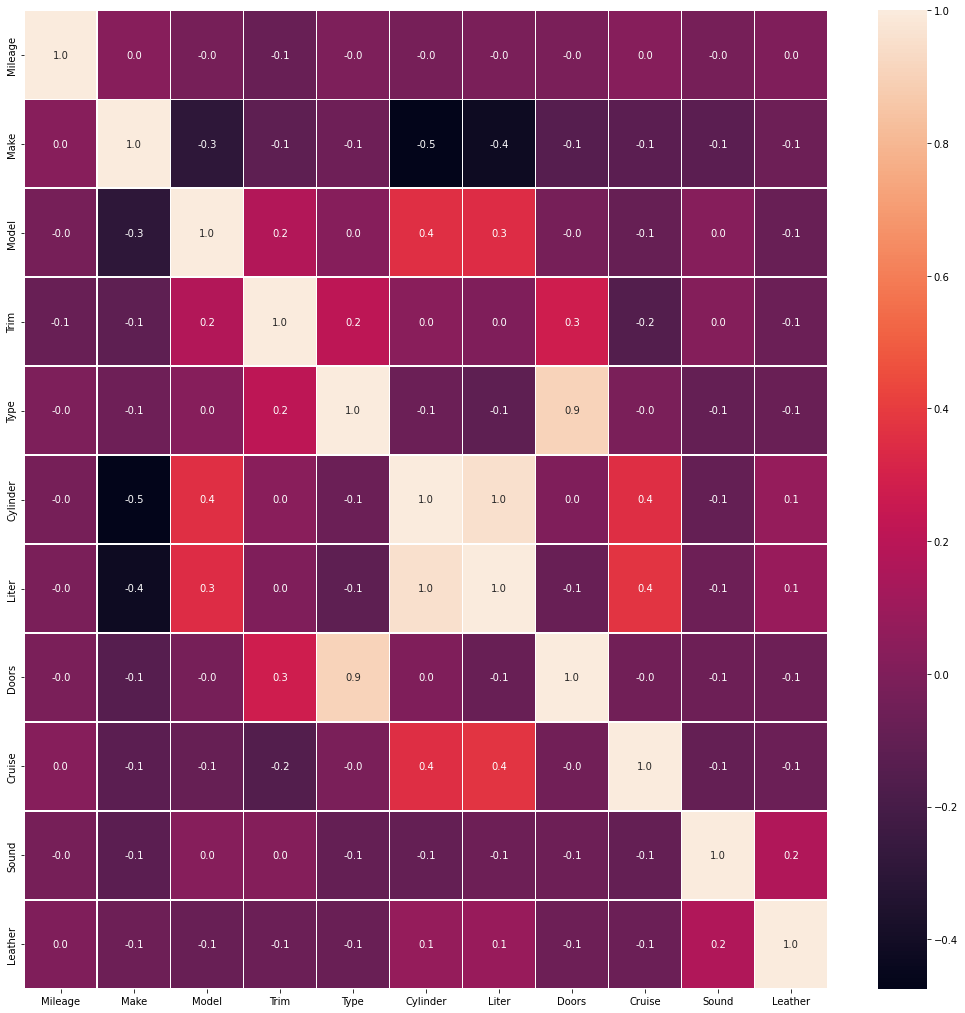

In [ ]:
# which feature affects the outcome the most?
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Splitting the dataset into the Training set and Test set

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results-MLR & R Score

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[24483.83 14862.09]
 [22058.74 16256.24]
 [ 9777.19 15802.65]
 [31068.72 45061.95]
 [14813.53 12425.39]
 [23912.65 25618.28]
 [ 9969.02 15174.35]
 [19532.37 26012.37]
 [22182.13 33005.78]
 [36525.15 70755.47]
 [13366.56 13811.16]
 [24959.92 20839.15]
 [23504.99 19774.25]
 [25479.28 32746.13]
 [22132.64 25959.12]
 [21815.29 15724.25]
 [21868.34 24852.5 ]
 [27239.95 22004.93]
 [27278.83 20676.17]
 [ 7435.2  14398.92]
 [10406.32 10354.04]
 [15324.59 13106.9 ]
 [27350.86 19204.81]
 [22693.91 21562.05]
 [22128.08 20406.1 ]
 [25002.02 17768.06]
 [21245.41 26698.08]
 [21745.54 16345.94]
 [29607.77 19682.04]
 [15566.61 11472.02]
 [ 9766.1  10770.11]
 [13865.69 11615.02]
 [33681.64 43892.47]
 [22614.41 31002.73]
 [23421.07 20017.97]
 [17692.59 25508.21]
 [21475.53 18957.89]
 [26062.65 17202.83]
 [33814.36 35129.34]
 [21462.42 23547.24]
 [15756.75 11318.01]
 [22206.71 19446.88]
 [18543.69 31970.54]
 [22897.62 16300.47]
 [23368.39 19294.79]
 [14477.28 11464.63]
 [28021.78 20698.08]
 [14842.22 14

In [ ]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.4306685774802236

## Training the Random Forest Regression model on the Training set & R Score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[15872.77 14862.09]
 [16470.36 16256.24]
 [15758.25 15802.65]
 [39906.74 45061.95]
 [12222.43 12425.39]
 [27026.8  25618.28]
 [15026.81 15174.35]
 [26297.84 26012.37]
 [31843.89 33005.78]
 [68517.26 70755.47]
 [13951.28 13811.16]
 [20469.87 20839.15]
 [20187.86 19774.25]
 [32252.02 32746.13]
 [27499.16 25959.12]
 [16196.44 15724.25]
 [25910.84 24852.5 ]
 [21538.2  22004.93]
 [20399.24 20676.17]
 [15622.11 14398.92]
 [10166.38 10354.04]
 [12778.96 13106.9 ]
 [17941.17 19204.81]
 [20210.96 21562.05]
 [21152.88 20406.1 ]
 [19265.38 17768.06]
 [27583.71 26698.08]
 [16759.64 16345.94]
 [21918.3  19682.04]
 [10977.92 11472.02]
 [11108.26 10770.11]
 [11189.98 11615.02]
 [43954.46 43892.47]
 [30999.05 31002.73]
 [19006.81 20017.97]
 [25082.03 25508.21]
 [19132.56 18957.89]
 [17924.55 17202.83]
 [36601.85 35129.34]
 [21139.6  23547.24]
 [12149.88 11318.01]
 [19089.98 19446.88]
 [33380.94 31970.54]
 [15897.18 16300.47]
 [17560.37 19294.79]
 [11937.79 11464.63]
 [20650.28 20698.08]
 [13946.19 14

In [ ]:
r2_score (y_test,y_pred)

0.986748640091433